# ch00.06. OpenCV 활용 - yolo
---
* 날짜: 2022-06-21
* 이름: 고민수

## 학습내용
    - yolo 모델에 대해 간단히 이해한다.
    - openCV와 yolo 를 이용해 객체 인식을 진행한다.
    - 차량판 인식 프로젝트를 진행한다.

## 학습자료


- [OpenCV 홈페이지](https://opencv.org/)

- [YOLO](https://pjreddie.com/darknet/yolo/)


<img src="https://miro.medium.com/max/1400/1*bSLNlG7crv-p-m4LVYYk3Q.png" width="600">

- 가장 빠른 객체 검출 알고리즘 중 하나
- 파이썬, 텐서플로 기반 프레임워크가 아닌 C++로 구현된 코드


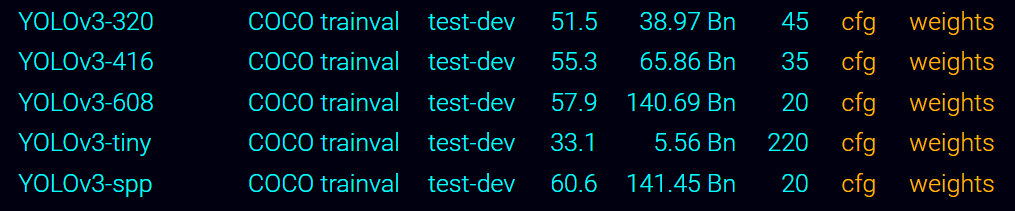

* 320, 416, 608, tiny, spp 는 들어가는 이미지, 상황을 고려해서 선택하면 된다.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import IPython

## 준비
---

### | 모델 불러오기

```
cv2.dnn.readNet(weight_file, cfg_file)
```

* weight 파일 다운로드 ( 코랩 환경 )

In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


* yolov3.cfg 는 새파일을 만든뒤 안의 내용을 복붙

In [7]:
weight_file = "yolov3.weights"
cfg_file = "./yolo_v3_model/yolov3.cfg"
model = cv2.dnn.readNet(weight_file, cfg_file)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: /yolo_v3_model/yolov3.cfg in function 'cv::dnn::dnn4_v20220524::readNetFromDarknet'


### | 클래스 이름 획득

* COCO 데이터 셋으로 이미 학습이 되었기 때문에 COCO 데이터셋의 클레스만을 탐지한다

In [4]:
name_file = "coco.names"
with open(name_file, "r") as f:
    class_names = []
    for line in f.readlines():
        class_names.append(line.strip())
print(len(class_names))

80


### | 클래스별 색상 획득

In [5]:
c_min = 0
c_max = 255
c_size = (len(class_names), 3)
colors = np.random.uniform(c_min, c_max, size=c_size)
print(colors.shape)
print(colors[1])

(80, 3)
[ 22.70122205 127.78120512 113.47037731]


### | 이미지 불러오기

(700, 1050, 3)


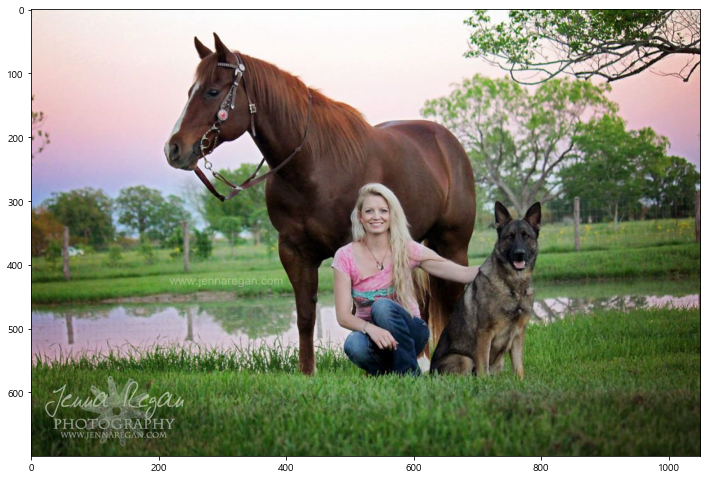

In [28]:
img = cv2.imread("../imgs/ex2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
img_h, img_w, img_c = img.shape
plt.figure(figsize=(12,12))
plt.imshow(img)

## 추론
---

### | 모델에 이미지 넣기


  <img src="https://www.researchgate.net/publication/335865923/figure/fig1/AS:804106595758082@1568725360777/Structure-detail-of-YOLOv3It-uses-Darknet-53-as-the-backbone-network-and-uses-three.jpg">



딥러닝에서 모델 = 연속된 함수 (레이어)
* 모델에 이미지 넣기
    - UnconnectedOutLayers 를 통해 3개의 output 을 하는 layer를 찾음
        - index 와 layer name
    - 이미지 전처리 - cv2.dnn.blobFromImage()
    - 모델에 넣기

In [29]:
layer_indexes = model.getUnconnectedOutLayers()
for out_layers in layer_indexes:
    print(out_layers) # 예측을 수항하는 레이어의 Index

[200]
[227]
[254]


In [30]:
all_layer_names = model.getLayerNames()
print(len(all_layer_names))
for idx, i in enumerate(all_layer_names):
    print(i,end="\t\t\t")
    if idx %3 == 0: print()

254
conv_0			
bn_0			relu_0			conv_1			
bn_1			relu_1			conv_2			
bn_2			relu_2			conv_3			
bn_3			relu_3			shortcut_4			
conv_5			bn_5			relu_5			
conv_6			bn_6			relu_6			
conv_7			bn_7			relu_7			
shortcut_8			conv_9			bn_9			
relu_9			conv_10			bn_10			
relu_10			shortcut_11			conv_12			
bn_12			relu_12			conv_13			
bn_13			relu_13			conv_14			
bn_14			relu_14			shortcut_15			
conv_16			bn_16			relu_16			
conv_17			bn_17			relu_17			
shortcut_18			conv_19			bn_19			
relu_19			conv_20			bn_20			
relu_20			shortcut_21			conv_22			
bn_22			relu_22			conv_23			
bn_23			relu_23			shortcut_24			
conv_25			bn_25			relu_25			
conv_26			bn_26			relu_26			
shortcut_27			conv_28			bn_28			
relu_28			conv_29			bn_29			
relu_29			shortcut_30			conv_31			
bn_31			relu_31			conv_32			
bn_32			relu_32			shortcut_33			
conv_34			bn_34			relu_34			
conv_35			bn_35			relu_35			
shortcut_36			conv_37			bn_37			
relu_37			conv_38			bn_38			
relu_38			conv_39			bn_39			
relu_39			shortcut_40			conv_41		

In [31]:
print(f"첫번째 prediction 레이어 이름: {all_layer_names[layer_indexes[0][0]-1]}")
print(f"첫번째 prediction 레이어 이름: {all_layer_names[layer_indexes[1][0]-1]}")
print(f"첫번째 prediction 레이어 이름: {all_layer_names[layer_indexes[2][0]-1]}")
# 레이어 이름 담기
layer_names = [ all_layer_names[layer_indexes[idx][0]-1] for idx in range(len(layer_indexes))]
print(layer_names)

첫번째 prediction 레이어 이름: yolo_82
첫번째 prediction 레이어 이름: yolo_94
첫번째 prediction 레이어 이름: yolo_106
['yolo_82', 'yolo_94', 'yolo_106']


In [32]:
# 이미지 전처리
blob = cv2.dnn.blobFromImage(img, 
                             0.00392,  # 색상 1/255 = 0.003921568627451
                             (416, 416), # 이미지 크기 416
                             (0,0,0), # 채널 처리 안함
                             True, # BGR -> RGB
                             crop=False
                             )

In [33]:
# 이미지 모델에 넣기
model.setInput(blob)

### | 추론 결과 해석



  <img src="https://www.researchgate.net/profile/Thi_Le3/publication/337705605/figure/fig3/AS:831927326089217@1575358339500/Structure-of-one-output-cell-in-YOLO.ppm">


In [34]:
# 계산 순전파
preds = model.forward( ["yolo_82","yolo_94" ,"yolo_106"])
print(preds[0].shape)
print(preds[1].shape)
print(preds[2].shape)

(507, 85)
(2028, 85)
(8112, 85)


In [35]:
print(preds[0].shape) # (507, 85) ->() Box 의 개수, 85개의 결과정보)
print(len(preds[0][0])) # 0번째 박스의 85개의 결과정보
print(preds[0][0]) # 좌표4개, 확신도, 원-핫 클래스의 스코어

(507, 85)
85
[4.0840648e-02 3.8950913e-02 2.3254777e-01 1.7592579e-01 1.0570043e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.00000

(507, 85)
(2028, 85)
(8112, 85)


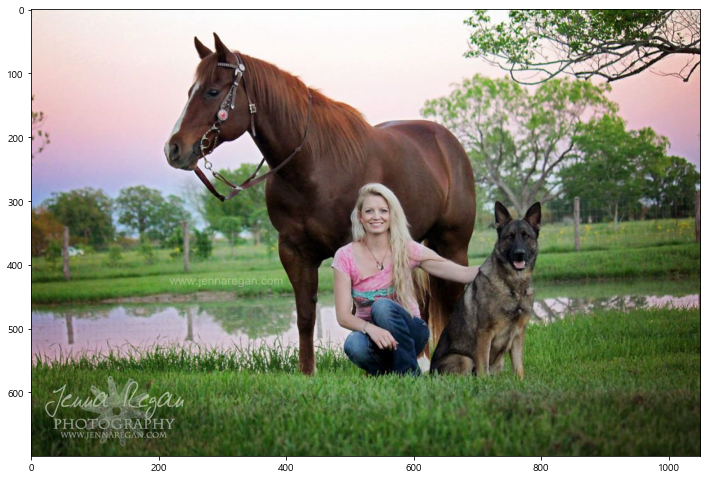

In [37]:
boxes = []
confidences = []
class_ids = []

for pred in preds:
    print(pred.shape)
    for v in pred:
        # 85개의 결과정보 정리
        box = v[:4]
        confidence = v[4]
        class_id = v[5:]
        class_id = np.argmax(class_id) # 가장 확률이 높은 클래스

        if confidence >0.5:

            x_center, y_center, w, h = box
            x_center, w = int(x_center * img_w), int(w * img_w)
            y_center, h = int(y_center * img_h), int(h *img_h)
            x, y = x_center-int(w/2), y_center-int(h/2)

            boxes.append([x,y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

plt.figure(figsize=(12,12))
_= plt.imshow(img)

### | 결과 시각화

* 박스의 class

In [38]:
class_ids

[0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0]

* 중복된 박스를 제거하고 한개를 남김

In [39]:
# 여러개의 중복 박스 중 한개를 골라준다.
idxs = cv2.dnn.NMSBoxes(boxes,
                        confidences,
                        0.5, # 최소 confidencs 
                        0.4) # 임계값 적을수록 많이 지움
idxs

array([[ 1],
       [11],
       [15]], dtype=int32)

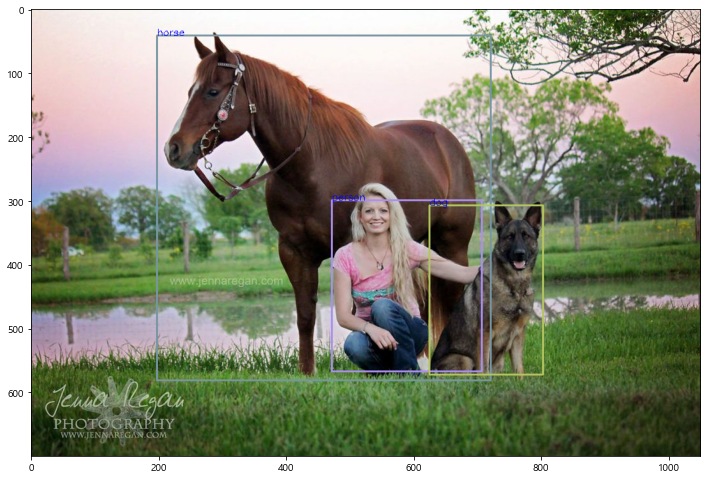

In [40]:
for bi, (x,y,w,h) in enumerate(boxes):
    if [bi] in idxs:
        class_id = class_ids[bi]
        color = colors[class_id]
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2 )
        cv2.putText(img, class_names[class_id], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
        
plt.figure(figsize=(12,12))
_ = plt.imshow(img)

## 함수 생성
---

In [66]:
def yolo416(img_path, model_path=""):
    # 라이브러리 호출
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
    
    # 이미지
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_h, img_w, img_c = img.shape
    
    # 모델
    weight_file = model_path + "yolov3.weights"
    cfg_file = model_path + "yolov3.cfg"
    model = cv2.dnn.readNet(weight_file, cfg_file)
    
    # 클래스 이름
    name_file = model_path + "coco.names"
    with open(name_file, "r") as f:
        class_names = []
        for line in f.readlines():
            class_names.append(line.strip())
 
    # 색 파레트
    c_min = 0
    c_max = 255
    c_size = (len(class_names), 3)
    colors = np.random.uniform(c_min, c_max, size=c_size)
      
    # 모델 레이어
    layer_indexes = model.getUnconnectedOutLayers() # 아웃풋이 있는 레이어
    all_layer_names = model.getLayerNames() # 모든 레이어의 이름
    layer_names = [ all_layer_names[layer_indexes[idx][0]-1] for idx in range(len(layer_indexes))] # 아웃풋 레이어의 이름
    
    # 이미지 전처리
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0,0,0), False, crop=False)
    
    # 모델에 이미지 담기
    model.setInput(blob)
    
    # 예측
    preds = model.forward( ["yolo_82","yolo_94" ,"yolo_106"])
    
    # 박스 계산
    boxes = []
    confidences = []
    class_ids = []

    for pred in preds:
        for v in pred:
            # 85개의 결과정보 정리
            box = v[:4]
            confidence = v[4]
            class_id = v[5:]
            class_id = np.argmax(class_id) # 가장 확률이 높은 클래스

            if confidence >0.5:

                x_center, y_center, w, h = box
                x_center, w = int(x_center * img_w), int(w * img_w)
                y_center, h = int(y_center * img_h), int(h *img_h)
                x, y = x_center-int(w/2), y_center-int(h/2)

                boxes.append([x,y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
                
     # 중복 박스 제거
    idxs = cv2.dnn.NMSBoxes(boxes,confidences,0.5, 0.4)
                
    # 박스, 이름표시
    for bi, (x,y,w,h) in enumerate(boxes):
        if [bi] in idxs:
            class_id = class_ids[bi]
            color = colors[class_id]
            caption = "{}: {:.4f}".format(class_names[class_id], confidences[bi])
            cv2.rectangle(img, (x, y), (x+w, y+h), color, 4 )
            cv2.putText(img, caption, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
            print(caption)
    print(img_path.split("/")[-1])
    plt.figure(figsize=(8,8))
    _ = plt.imshow(img)

### | 이미지 적용

horse: 0.9973
person: 0.9901
dog: 0.9985
ex2.jpg


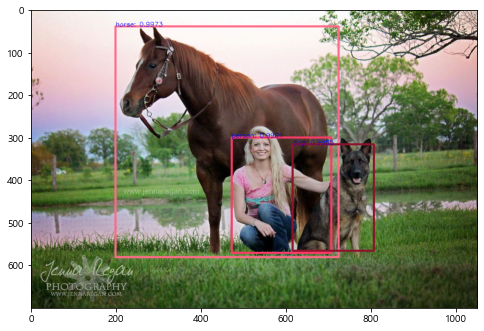

In [66]:
yolo416("../imgs/ex2.jpg")

cat: 0.9915
leo.jpg


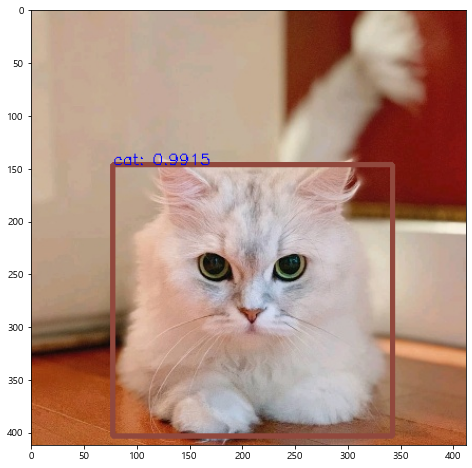

In [67]:
yolo416("../imgs/leo.jpg")

umbrella: 0.5535
umbrella: 0.9761
umbrella: 0.9997
umbrella: 0.9674
umbrella: 0.8483
unbrella.jpg


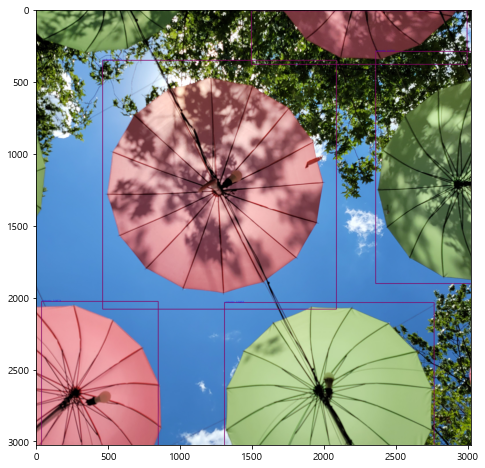

In [68]:
yolo416("../imgs/unbrella.jpg")

### | 동영상 적용

## 과제
---

**차량 번호판 탐지 프로젝트**

![](http://file.carisyou.com/upload/2018/11/20/EDITOR_201811201122494820.jpg)


* Step1. 전체 이미지를 '차량' 인식 모델(=yolo)에 넣는다. 
* Step2. yolo를 통해 '차량' 영역의 좌표를 얻는다. 
* Step3. 좌표를 이용해 '차량' 영역만 크롭한 이미지를 번호판 인식 모델(=haarcascade)에 넣는다.
 - `haarcascade_russian_plate_number.xml`

* Step4. 번호판 영역의 좌표를 얻고 시각화 한다.


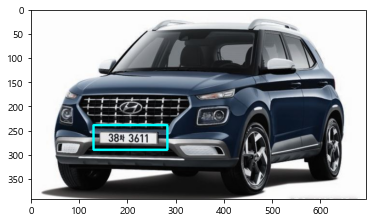

In [13]:
# 라이브러리
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지
img_path = "../imgs/car_samp1.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_h, img_w, img_c = img.shape

# 모델
model_path = "yolo_v3_model/"
weight_file =  model_path + "yolov3.weights"
cfg_file = model_path + "yolov3.cfg"
model = cv2.dnn.readNet(weight_file, cfg_file)
num_model = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_russian_plate_number.xml')

# 클래스 이름
name_file = model_path + "coco.names"
with open(name_file, "r") as f:
    class_names = []
    for line in f.readlines():
        class_names.append(line.strip())

# 색 파레트
c_min = 0
c_max = 255
c_size = (len(class_names), 3)
colors = np.random.uniform(c_min, c_max, size=c_size)

# 모델 레이어
layer_indexes = model.getUnconnectedOutLayers() # 아웃풋이 있는 레이어
all_layer_names = model.getLayerNames() # 모든 레이어의 이름
layer_names = [ all_layer_names[layer_indexes[idx][0]-1] for idx in range(len(layer_indexes))] # 아웃풋 레이어의 이름

# 이미지 전처리
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0,0,0), False, crop=False)

# 모델에 이미지 담기
model.setInput(blob)

# 예측
preds = model.forward( ["yolo_82","yolo_94" ,"yolo_106"])

# 박스 계산
boxes = []
confidences = []
class_ids = []

for pred in preds:
    for v in pred:
        # 85개의 결과정보 정리
        box = v[:4]
        confidence = v[4]
        class_id = v[5:]
        class_id = np.argmax(class_id) # 가장 확률이 높은 클래스

        if confidence >0.8:

            x_center, y_center, w, h = box
            x_center, w = int(x_center * img_w), int(w * img_w)
            y_center, h = int(y_center * img_h), int(h *img_h)
            x, y = x_center-int(w/2), y_center-int(h/2)

            boxes.append([x,y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            
# 중복 제거 index
idxs = cv2.dnn.NMSBoxes(boxes,confidences,0.5, 0.4)

# 중복 제거
boxes = list(map(lambda x: boxes[x[0]], idxs))
confidences = list(map(lambda x: confidences[x[0]], idxs))
class_ids = list(map(lambda x: class_ids[x[0]], idxs))

# img를 벗어나는 박스 수정
for i in boxes:
    if i[0]<0: i[0]=0

# 차량번호판 박스 표시
for bi, (x,y,w,h) in enumerate(boxes):
    croped = img[y:y+h, x:x+w]
    pred_num = num_model.detectMultiScale(croped)

    for (x1,y1,w1,h1) in pred_num:
        cv2.rectangle(img, (x+x1,y+y1), (x+x1+w1, y+y1+h1), (0,255,255), 3)
                
plt.imshow(img)

In [6]:
pred_num

()